***IMPORTS AND OPTIONS***


In [2]:
!pip install catboost
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.6 MB/s eta 0:00:00


In [4]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV



warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df = pd.read_csv("/content/insurance.csv")

# General Analysis

In [5]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


check_df(df)

##################### Shape #####################
(1338, 7)
##################### Types #####################
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
##################### Head #####################
   age     sex    bmi  children smoker     region   charges
0   19  female 27.900         0    yes  southwest 16884.924
1   18    male 33.770         1     no  southeast  1725.552
2   28    male 33.000         3     no  southeast  4449.462
##################### Tail #####################
      age     sex    bmi  children smoker     region   charges
1335   18  female 36.850         0     no  southeast  1629.833
1336   21  female 25.800         0     no  southwest  2007.945
1337   61  female 29.070         0    yes  northwest 29141.360
##################### NA #####################
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
d

# Analyzing "bmi"

<Axes: title={'center': 'BMI Distribution Histogram'}, ylabel='Frequency'>

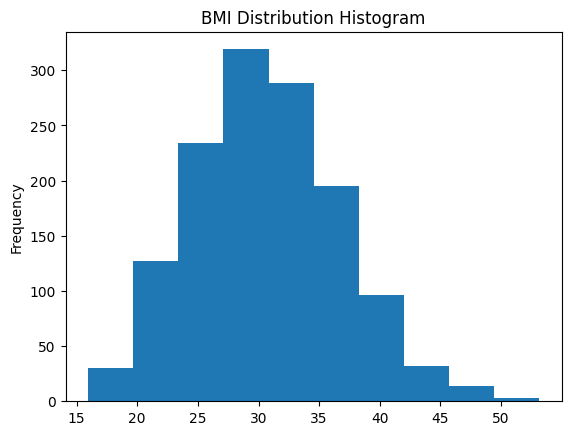

In [6]:

df["bmi"].plot(kind="hist", title="BMI Distribution Histogram")

<Axes: title={'center': 'BMI Distribution Density'}, ylabel='Density'>

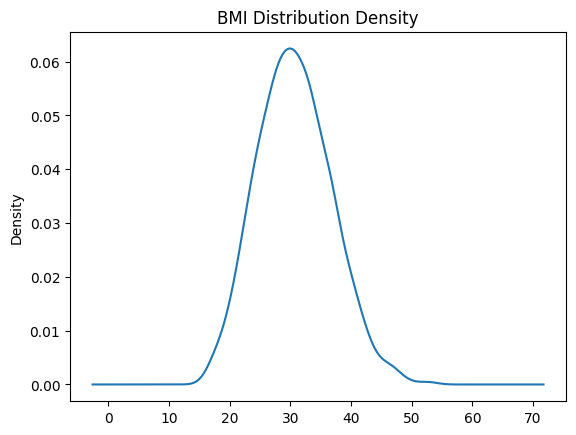

In [7]:
df["bmi"].plot(kind="density", title="BMI Distribution Density")

**Majority distributed around 30 BMI which means overweight**

# Analyzing "charges" and "smoker"

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


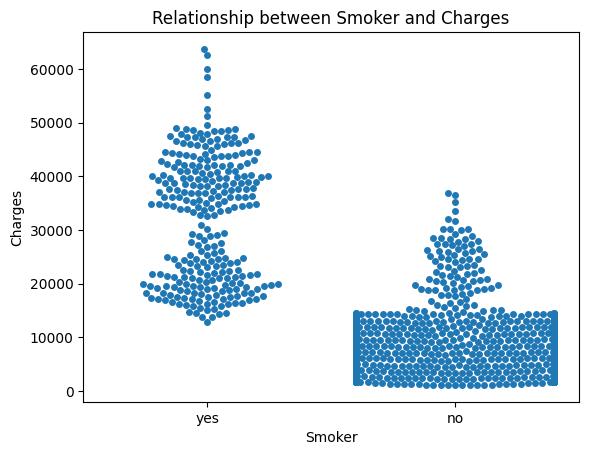

In [8]:
# Swarm plot
sns.swarmplot(x="smoker", y="charges", data=df)
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.title("Relationship between Smoker and Charges")
plt.show()

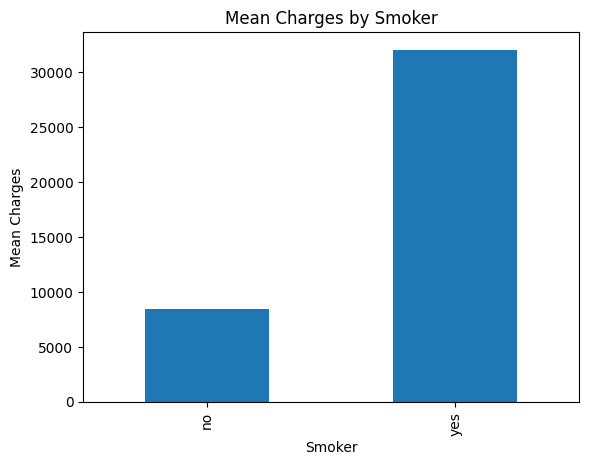

In [9]:
# Bar plot
charges_mean_by_smoker = df.groupby("smoker")["charges"].mean()
charges_mean_by_smoker.plot(kind="bar")
plt.xlabel("Smoker")
plt.ylabel("Mean Charges")
plt.title("Mean Charges by Smoker")
plt.show()


**We can easily say that people who do not smoke is healthier than people who smoke and that significantly affects their insurance charge.**

# Analyzing "region" and "smoker"

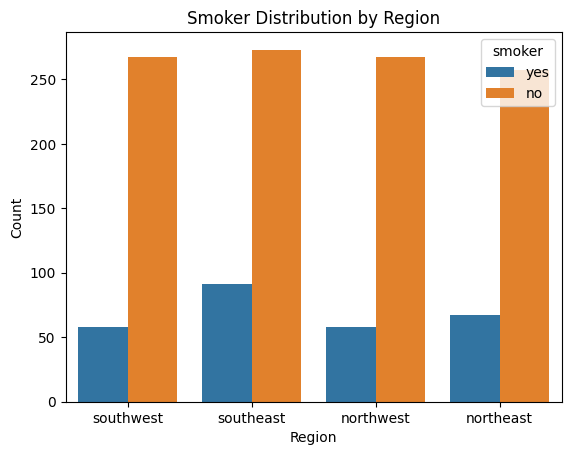

In [ ]:
sns.countplot(x="region", hue="smoker", data=df)
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Smoker Distribution by Region")
plt.show()

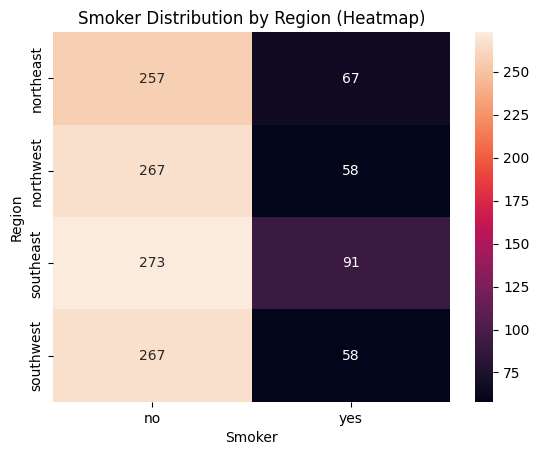

In [ ]:
df_pivot = df.pivot_table(index="region", columns="smoker", aggfunc="size", fill_value=0)
sns.heatmap(df_pivot, annot=True, fmt="d")
plt.xlabel("Smoker")
plt.ylabel("Region")
plt.title("Smoker Distribution by Region (Heatmap)")
plt.show()

**Southeast has the most people who smokes among other regions. Other than that the non-smoker count is very close between regions.**

# Analyzing "sex" and "bmi"

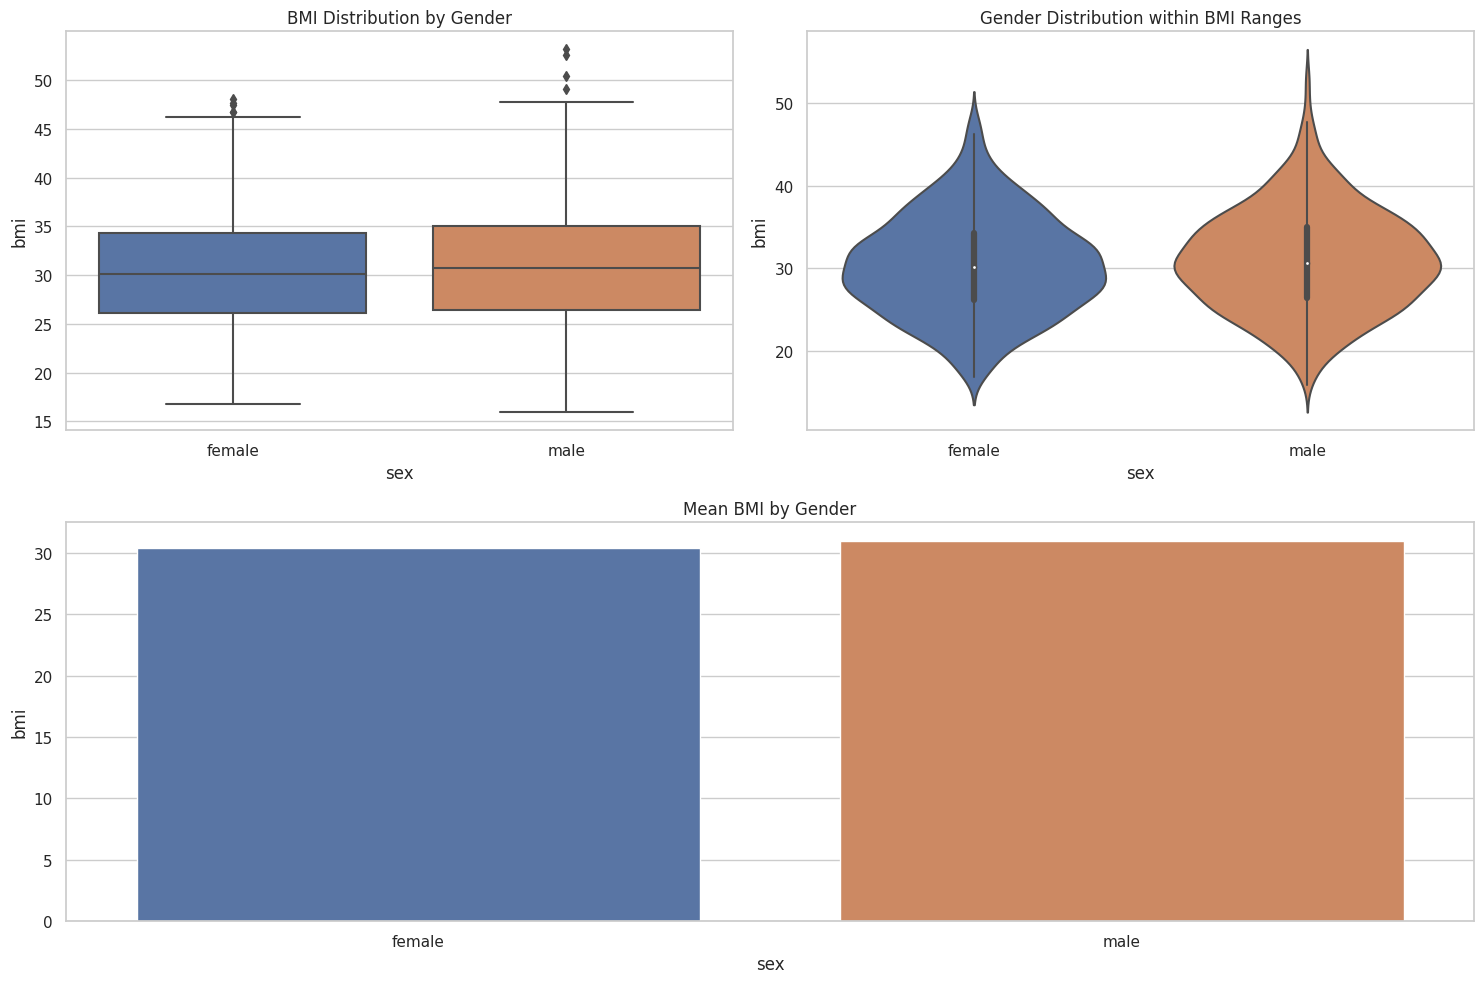

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
sns.boxplot(data=df, x="sex", y="bmi")
plt.title("BMI Distribution by Gender")


plt.subplot(2, 2, 2)
sns.violinplot(data=df, x="sex", y="bmi")
plt.title("Gender Distribution within BMI Ranges")


def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df["bmi_category"] = df["bmi"].apply(categorize_bmi)

plt.subplot(2, 1, 2)
sns.barplot(data=df, x="sex", y="bmi", estimator="mean", ci=None)
plt.title("Mean BMI by Gender")

plt.tight_layout()
plt.show()

**For both genders mean BMI is equal and it is 30.**

# Find the "region" with the most "children".


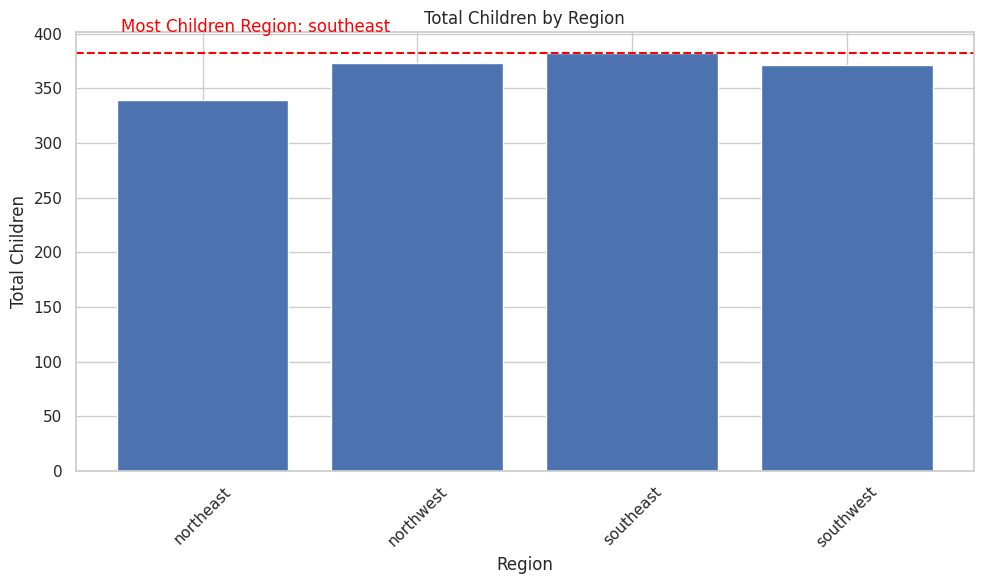

In [ ]:
region_child_counts = df.groupby("region")["children"].sum()
most_children_region = region_child_counts.idxmax()

# Bar plot
plt.figure(figsize=(10, 6))

plt.bar(region_child_counts.index, region_child_counts.values)
plt.xlabel("Region")
plt.ylabel("Total Children")
plt.title("Total Children by Region")
plt.xticks(rotation=45)
plt.axhline(y=region_child_counts[most_children_region], color="red", linestyle="--")
plt.text(0.05, 1.0, f"Most Children Region: {most_children_region}", transform=plt.gca().transAxes, color="red")
plt.tight_layout()
plt.show()

**The region with the most children is southeast**

# Examine the relationship between “age” and “bmi”.


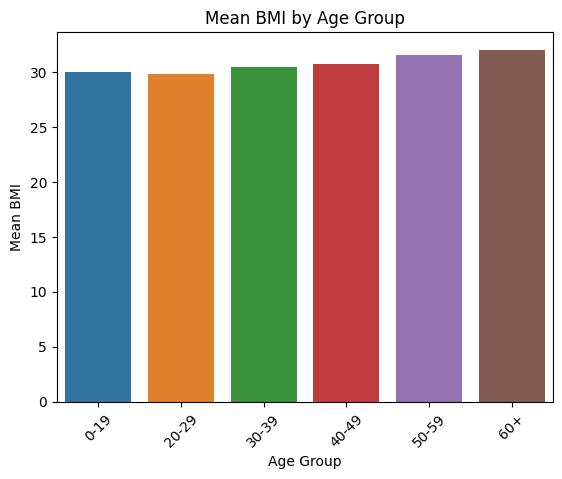

In [ ]:
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60+', ]


df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Barplot
sns.barplot(x='age_group', y='bmi', data=df, errorbar=None)
plt.xlabel('Age Group')
plt.ylabel('Mean BMI')
plt.title('Mean BMI by Age Group')
plt.xticks(rotation=45)
plt.show()

**Mean BMI distributed normally. But it increases as age gets older.**

# Examine the relationship between “bmi” and “children”.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 52.1% of the points cannot be place

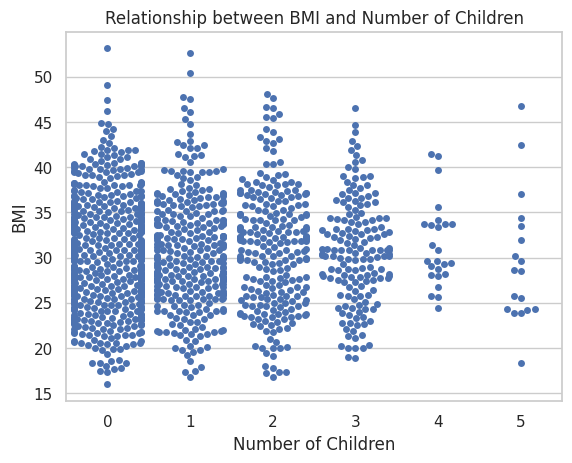

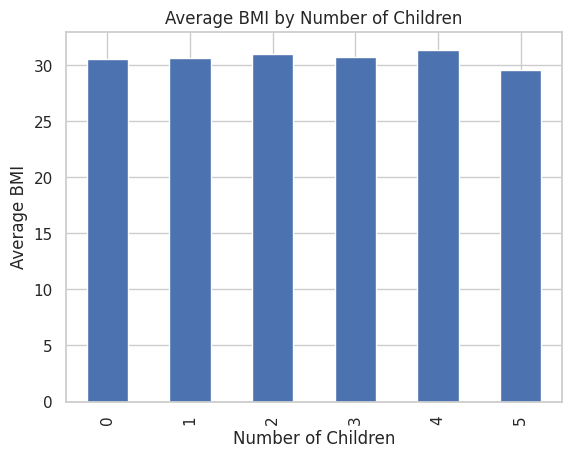

In [ ]:
sns.swarmplot(x="children", y="bmi", data=df)
plt.xlabel("Number of Children")
plt.ylabel("BMI")
plt.title("Relationship between BMI and Number of Children")
plt.show()


bins = [0, 1, 2, 3, 4, 5, 6]
labels = ["0", "1", "2", "3", "4", "5"]
df["children_category"] = pd.cut(df["children"], bins=bins, labels=labels, right=False)

bmi_by_children = df.groupby("children_category")["bmi"].mean()

# Bar plot
bmi_by_children.plot(kind="bar")

plt.xlabel("Number of Children")
plt.ylabel("Average BMI")
plt.title("Average BMI by Number of Children")

plt.show()

**Number of children does not seem to be affecting Average BMI or BMI in general.**

# Is there an outlier in the "bmi" variable?

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

check_outlier(df, "bmi")



False

**There is no outlier.**

# Examine the relationship between “bmi” and “charges”.

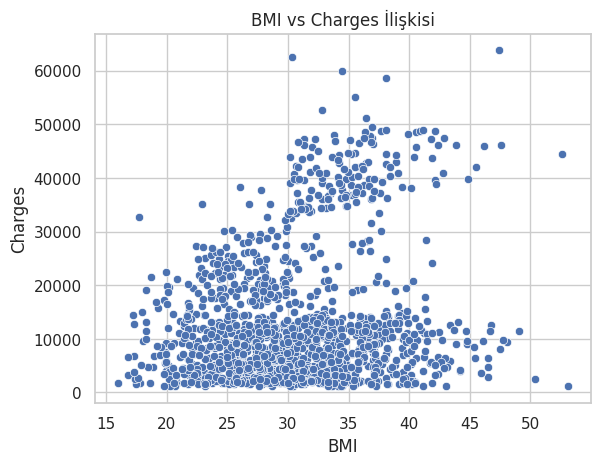

In [ ]:
sns.scatterplot(data=df, x="bmi", y="charges")
plt.title("BMI vs Charges İlişkisi")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

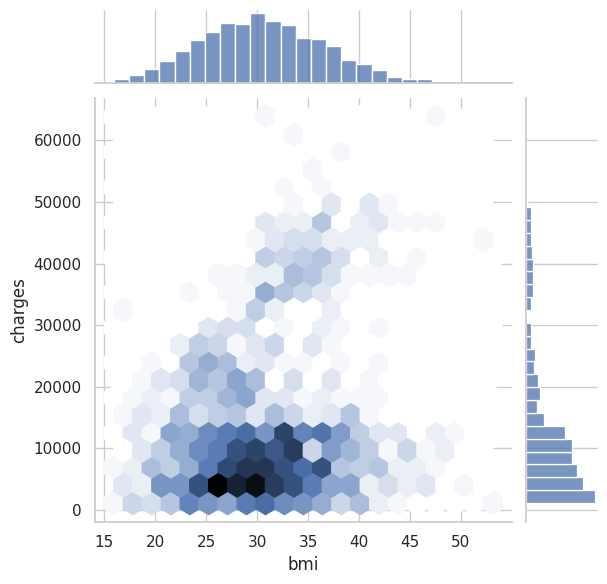

In [ ]:
sns.jointplot(data=df, x="bmi", y="charges", kind="hex", gridsize=20)
plt.show()

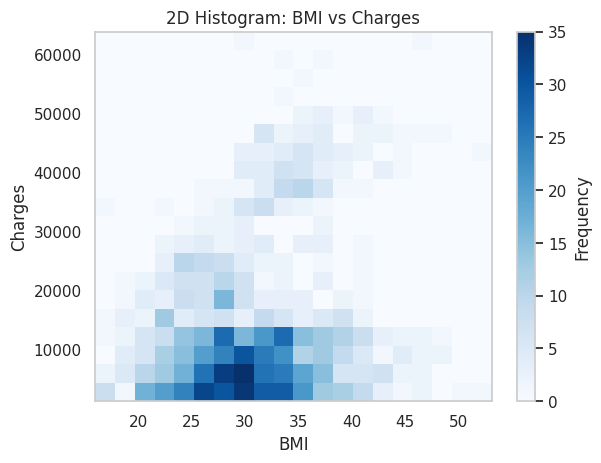

In [ ]:
plt.hist2d(data=df, x="bmi", y="charges", bins=(20, 20), cmap="Blues")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("2D Histogram: BMI vs Charges")
plt.colorbar(label="Frequency")
plt.show()

**In general, charges distributed mostly around 10.000 regardless of BMI. But we can see that after BMI exceeds the value of 30, the number of values between 30.000-50.000 in charges increases**

# Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

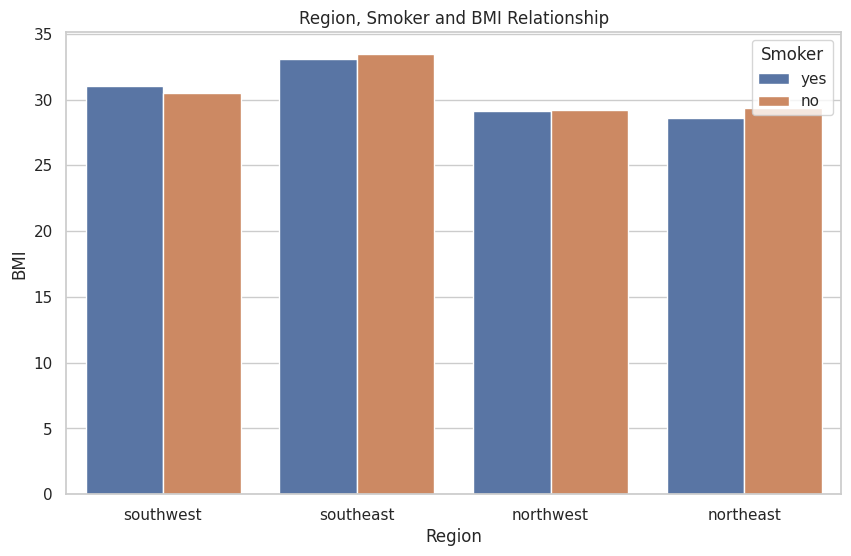

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="region", y="bmi", hue="smoker", ci=None)
plt.title("Region, Smoker and BMI Relationship")
plt.xlabel("Region")
plt.ylabel("BMI")
plt.legend(title="Smoker")
plt.show()

**In this graphic, we can see that in southwest mean BMI of smokers are higher than non-smokers. In southeast and northeas mean BMI of non-smokers are higher.
 Lastly in the northwest mean BMI of both smokers and non smokers is equal**

# Data Pre-Processing

In [ ]:
def grab_col_names(df, cat_th=10, car_th=20):

    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    num_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and
                   df[col].dtypes != "O"]
    cat_but_car = [col for col in df.columns if df[col].nunique() > car_th and
                   df[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in df.columns if df[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {df.shape[0]}")
    print(f"Variables: {df.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if col != "charges"]
for col in num_cols:
    print(col, check_outlier(df, col))


Observations: 1338
Variables: 9
cat_cols: 6
num_cols: 3
cat_but_car: 0
num_but_cat: 2
age False
bmi False


## Feature Engineering


In [ ]:
# NEW_BMI_Segmentation
df.loc[(df["bmi"] <= 18.5), "NEW_BMI_Segmentation"] = "Underweight"
df.loc[((df["bmi"] > 18.5) & (df["bmi"] < 25)), "NEW_BMI_Segmentation"] = "Normal"
df.loc[((df["bmi"] >= 25) & (df["bmi"] < 30)), "NEW_BMI_Segmentation"] = "Overweight"
df.loc[((df["bmi"] >= 30) & (df["bmi"] < 35)), "NEW_BMI_Segmentation"] = "Obese 1"
df.loc[((df["bmi"] >= 35) & (df["bmi"] < 40)), "NEW_BMI_Segmentation"] = "Obese 3"
df.loc[(df["bmi"] >= 40), "NEW_BMI_Segmentation"] = "Obese 3"
# NEW_AGE_Segmentation
df.loc[(df["age"] <= 18), "NEW_AGE_Segmentation"] = "Child"
df.loc[((df["age"] > 18) & (df["age"] <= 25)), "NEW_AGE_Segmentation"] = "Young"
df.loc[((df["age"] > 25) & (df["age"] <= 40)), "NEW_AGE_Segmentation"] = "Adult"
df.loc[((df["age"] > 40) & (df["age"] < df['age'].max())), "NEW_AGE_Segmentation"] = "Old"

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 1338
Variables: 11
cat_cols: 8
num_cols: 3
cat_but_car: 0
num_but_cat: 2


# Encoding

In [ ]:
label_encoders = {}
for column in cat_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

def one_hot_encoder(dataframe,cat_cols,drop_first=False):
    dataframe=pd.get_dummies(dataframe,columns=cat_cols,drop_first=drop_first)
    return dataframe
ohe_cols=[col for col in df.columns if 10>=df[col].nunique()>2]

df=one_hot_encoder(df,ohe_cols,drop_first=True)

# Scaling

In [ ]:
for col in num_cols:
    transformer=RobustScaler().fit(df[[col]])
    df[col]=transformer.transform(df[[col]])

# Model Development

In [ ]:
y = df['charges']
X = df.drop(["charges"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Model evalution and Hyper parameter optimization

In [ ]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("CatBoost", CatBoostRegressor(verbose=False))]
for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")
models = [
    ("Ridge", Ridge(), {"alpha": [0.1, 1.0, 10.0]}),
    ("RF", RandomForestRegressor(), {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}),
    ("XGBoost", XGBRegressor(objective='reg:squarederror'), {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 7]}),
    ("CatBoost", CatBoostRegressor(verbose=False), {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 7]}),
    ("SVR",SVR(),{ 'C': [0.1, 1, 10],'kernel': ['linear', 'poly', 'rbf']})
]


for name, model, param_grid in models:
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X, y)

    best_params = grid_search.best_params_
    best_score = np.sqrt(-grid_search.best_score_)
    print(f"Best Parameters for {name}: {best_params}")
    print(f"Best RMSE: {round(best_score, 4)}")

RMSE: 0.5048 (LR) 
RMSE: 0.5048 (Ridge) 
RMSE: 1.017 (Lasso) 
RMSE: 1.017 (ElasticNet) 
RMSE: 0.6957 (KNN) 
RMSE: 0.567 (CART) 
RMSE: 0.4181 (RF) 
RMSE: 0.3899 (SVR) 
RMSE: 0.3868 (GBM) 
RMSE: 0.4533 (XGBoost) 
RMSE: 0.4011 (CatBoost) 
Best Parameters for Ridge: {'alpha': 1.0}
Best RMSE: 0.505
Best Parameters for RF: {'max_depth': 10, 'n_estimators': 50}
Best RMSE: 0.4141
Best Parameters for XGBoost: {'max_depth': 3, 'n_estimators': 50}
Best RMSE: 0.3895
Best Parameters for CatBoost: {'max_depth': 3, 'n_estimators': 200}
Best RMSE: 0.3856
Best Parameters for SVR: {'C': 1, 'kernel': 'rbf'}
Best RMSE: 0.3912
